<a href="https://colab.research.google.com/github/1dgog/TC3006C_portafolio_m2/blob/main/a01139500_m2_retro_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Momento de retroalimentación con framework

## Importación de librerías y dataset

In [31]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive
/content/gdrive/MyDrive
'Colab Notebooks'	 iris.data	     real_estate.csv    Valhalla23.csv
'Documentos utiles'	 iris.names	     real_state.csv     wine.data
 EBSCO			 LiFE		    'Servicio Social'   wine.names
 EGSGLP			'Plan de estudios'  'Sin ordenar'
 Fotos			 PlayDataset.csv     test.csv
 gender_submission.csv	 Portugues	     train.csv


### Librerias

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

### Nombramiento de dataset y visualización inicial

In [33]:
columns = ["alcohol","malic_acid","ash","alcalinity_of_ash", "magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280","proline"] # definir nombres de columna manualmente
df = pd.read_csv('wine.data',names = columns) # abrir el archivo de datos con los nombres dados para las columnas
df = df.reset_index() # se añade un nuevo indice para que el indice previo sea una clasificación que se usara en la siguiente figura.
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity_of_ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  od280                 178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
   index  alcohol  mal

Se nombran los datasets de entrada y salida con el que será entrenado el modelo

In [34]:
dfInput = df[["alcohol","malic_acid","ash","alcalinity_of_ash", "magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280","proline"]]
dfOutput = df[["index"]]

## Aplicación de redes neuronales

### Separación de datos de entrenamiento y datos de prueba

In [35]:
X_train, X_test, y_train, y_test = train_test_split(dfInput, dfOutput, random_state=0)

Se hizo un ciclo for en el que se inicia con 5 capas ocultas y va hasta cuarenta con pasos de 5.

Lo mismo para el segundo que especifica el tamaño de la capa.

Estos datos se almacenan en vectores, tanto para los datos de entrenamiento como para los de test.

In [46]:
scores_train = []
scores_test = []
cont = 0
for ii in range (5,40, 5):
  if cont == 1:
    scores_train.append(jj_scores_train)
    scores_test.append(jj_scores_test)
  cont = 1
  jj_scores_train = []
  jj_scores_test = []
  for jj in range(5,40,5):
    cross_val_predict,
    nnRE = MLPClassifier(hidden_layer_sizes=(ii,jj),  ## cambiar estos parámetros
                        activation='logistic', verbose=False, solver='adam',
                        learning_rate='adaptive', max_iter=2000)
    nnRE.fit(X_train,y_train)
    jj_scores_train.append(nnRE.score(X_train, y_train))
    jj_scores_test.append(nnRE.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

In [51]:
print(scores_train)
print(scores_test)
scores_train.info()

AttributeError: ignored

### Coeficientes de las redes neuronales

In [48]:
print(nnRE)
print(nnRE.coefs_)

MLPClassifier(activation='logistic', hidden_layer_sizes=(35, 35),
              learning_rate='adaptive', max_iter=2000)
[array([[-1.36863129e-01,  4.18075426e-02,  9.55163886e-03,
         5.98048288e-02,  2.84467889e-01, -1.77197181e-01,
         1.30913705e-01, -1.60092047e-01, -2.35204220e-02,
        -4.18189820e-02,  1.94735522e-01,  2.23745717e-01,
         2.21152911e-01,  3.13041735e-01, -1.27197621e-02,
         2.42584740e-01,  1.10123552e-01,  9.13844510e-02,
        -1.41653078e-01, -4.43506323e-02,  1.24917063e-01,
        -1.26471699e-01, -1.30512644e-01, -6.98515194e-02,
        -2.30556231e-02,  1.93584798e-02,  1.58961592e-01,
         2.14257888e-01, -4.87569115e-02,  4.00322202e-03,
        -2.51812632e-01,  1.44264087e-01, -1.75063656e-01,
         7.84993650e-02,  1.86807068e-01],
       [ 4.40361816e-01, -1.12821517e-01, -2.54622911e-01,
        -4.43784351e-01, -4.90593904e-02,  5.03494582e-01,
         1.03471642e-02,  4.17330752e-01,  4.13095537e-01,
         

## Visualización de scores

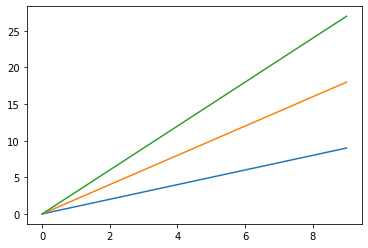

In [49]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(10)

for a in length(scores_train):
    plt.plot(x, a*x)

plt.show()

## Evaluación del modelo

Se hacen las predicciones

In [ ]:
pred_train = cross_val_predict(nnRE,X_train,y_train, cv = 10)
pred_train = cross_val_predict(nnRE,X_test,y_test, cv = 10)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

[[13 30  0]
 [ 0 49  1]
 [ 0 28 12]]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

[[12  4  0]
 [ 0 21  0]
 [ 1  3  4]]


### Matrices de confusión

In [ ]:
print(confusion_matrix(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))

## Notas de asesoría.

Sesgo y varianza, estan relacionados, tiene que ver con el overfitting. Si tiene poco ses

Poner en terminos de bajo, medio y alto. 

No es necesario que sea de varios frameworks, con uno basta.}

Se pueden hacer gráficas de como cambia el score.